# Paper Replicating

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torchinfo
from torch import nn
import matplotlib.pyplot as plt
from going_modular.going_modular import data_setup, engine
from helper_functions import download_data, set_seeds, plot_loss_curves
import os
device = "cuda" if torch.cuda.is_available() else "cpu"
device

c:\Users\ArnavBhatia\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'cuda'

## 1 Getting Data

In [2]:
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data\pizza_steak_sushi directory exists, skipping download.


WindowsPath('data/pizza_steak_sushi')

In [3]:
train_dir=image_path/"train"
test_dir=image_path/"test"
train_dir,test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

## 2 Dataset and Dataloaders

### 2.1 Creating transforms

In [4]:
IMG_SIZE=(224,224)
BATCH_SIZE=32
manual_transform=transforms.Compose(
    [transforms.Resize(IMG_SIZE),
    transforms.ToTensor()]
)
manual_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)

### 2.2 Dataloaders

In [5]:
from going_modular.going_modular.data_setup import create_dataloaders
train_dataloader,test_dataloader,class_names=create_dataloaders(train_dir=train_dir,test_dir=test_dir,num_workers=os.cpu_count(),transform=manual_transform,batch_size=32)
train_dataloader,test_dataloader,class_names

(<torch.utils.data.dataloader.DataLoader at 0x1f31bda4e00>,
 ['pizza', 'steak', 'sushi'])

### 2.3 Get single image

In [6]:
image_batch,label_batch=next(iter(train_dataloader))
image,label=image_batch[0],label_batch[0]
image.shape,label

(torch.Size([3, 224, 224]), tensor(1))

plotting

(-0.5, 223.5, 223.5, -0.5)

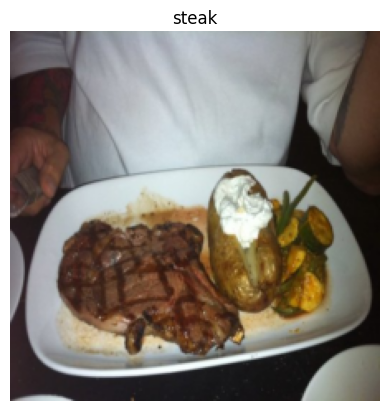

In [7]:
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis("off")

## 3 Replicating VIT

### 3.1 Vit Overview : Pieces of puzzle
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/08-vit-paper-four-equations.png" width=650 alt="four mathematical equations from the vision transformer machine learning paper"/>


3.1.1 

x_input = [class_token, image_patch_1, image_patch_2, image_patch_3...] + [class_token_position, image_patch_1_position, image_patch_2_position, image_patch_3_position...]

eqn 3 and 4 has MSA and MLP with LN(normalizaion)